In [81]:
import sys; sys.path.append("../../")
from DataPreprocessing.DataPreprocessing import *
from DataExploration.DataExploration import *
from utils import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split

# Question:
    Predict sales of a game given Genre, platform, publisher, developer and critic score



## 1- Expectations: 
    The model should determine the game characteristics through year,developed,publisher
    and platform that best predict that sales of a game.

## Read Data 

In [82]:
df = read_data(kind='dataset')
df = df.dropna()

## EDA

## Target Column Distribution: Global Sales


e:\fourth year\second term\DS\Data_Science-Project\Analysis\PredictiveQuestions\utils.py:47: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col] , fit=norm);


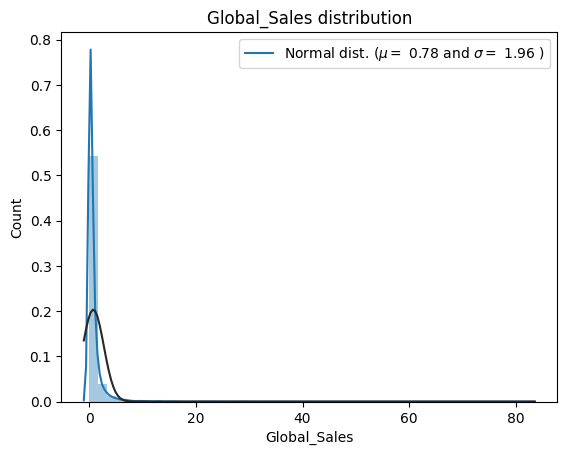

In [83]:
plot_distribution(df, 'Global_Sales')

### 1- Global sales distribution over all te genres

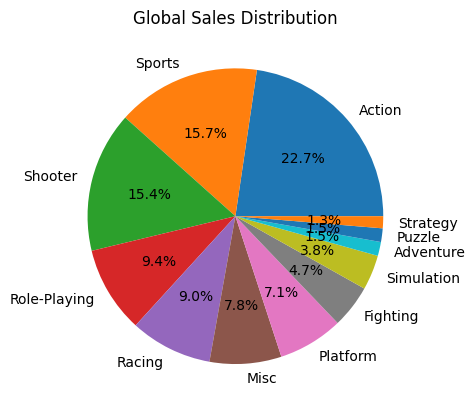

In [84]:
'''from the below pie chat we see that Genre with highest global sales Action
and the lowest is stratrgy'''
genres = df['Global_Sales'].groupby(df['Genre']).sum().sort_values(ascending=False).to_frame()
plt.pie(genres['Global_Sales'],labels = genres.index,autopct = '%1.1f%%') #plot first pie
plt.title('Global Sales Distribution')
plt.show()

### 2-Platforms with highest global sales

'from the below graph we see that Platform with highest global sales \nis PS2 and the lowest is DC'

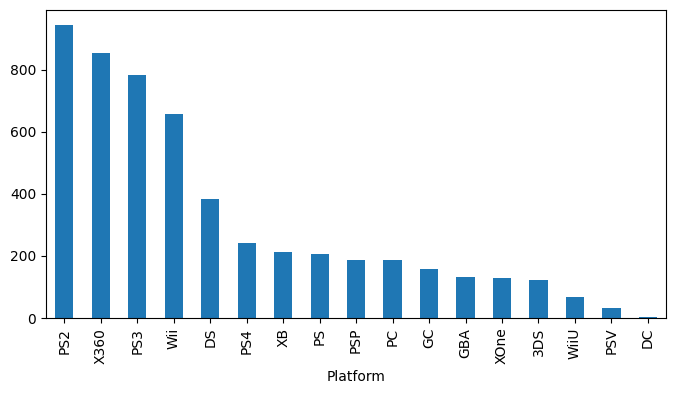

In [85]:
df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(8,4))
'''from the below graph we see that Platform with highest global sales 
is PS2 and the lowest is DC'''


### 3- Top 30 developers with highest global sales

<Axes: xlabel='Developer'>

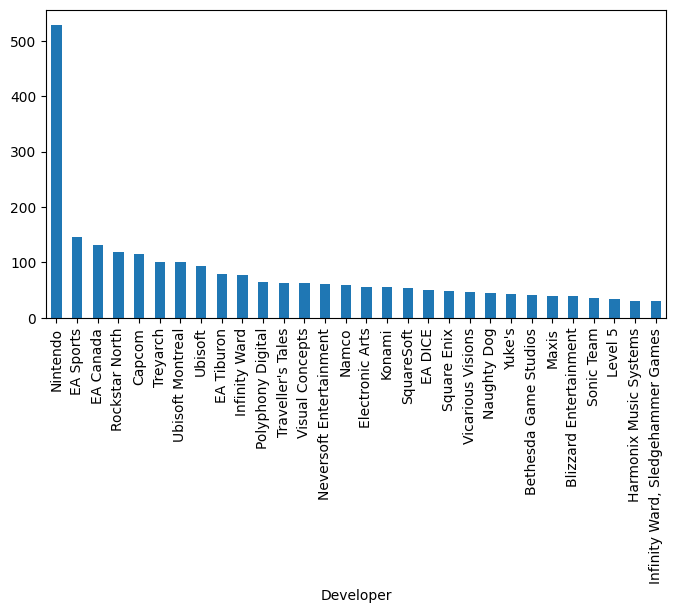

In [86]:
df.groupby('Developer')['Global_Sales'].sum().sort_values(ascending=False).head(30).plot(kind='bar', figsize=(8,4))


### 4- Top 20 Publishers

<Axes: xlabel='Publisher'>

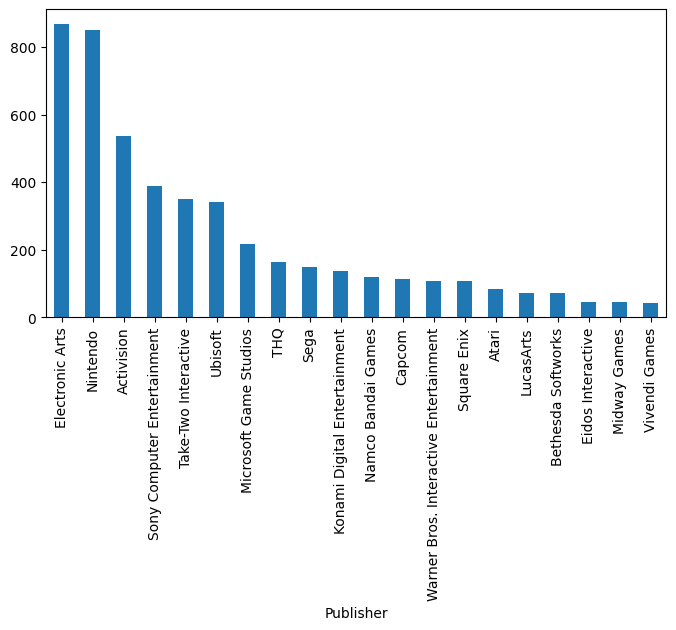

In [87]:
df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(8,4))

### 5- Critic Score  Vs Global Sales

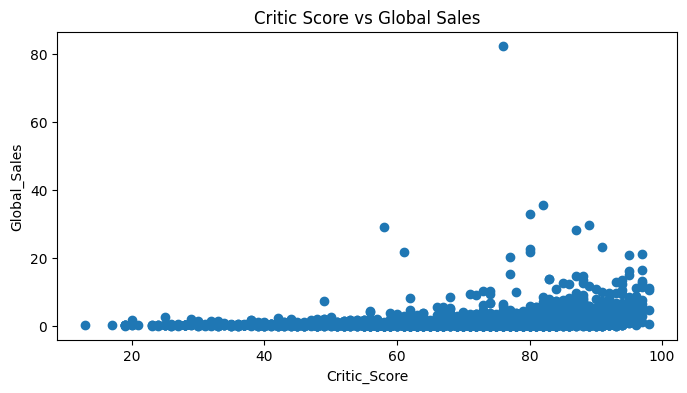

In [88]:
scatter(df,'Critic_Score','Global_Sales','Critic Score vs Global Sales')

### Remove common outliers between global sales and critic values

In [89]:
df['User_Score'] = df['User_Score'].astype(float)
df=remove_common_outliers(df ,[ 'Critic_Score','Global_Sales','Critic_Count','User_Count','User_Score'])

Number of outliers removed: 1617


### Critic Score vs global sales after removing outliers
    now it makes more sense and sales of the games are now rational instead of having one or two games 
    has too much sales now we train over more suitable data
    - it seems that there's a correlation between critic score and sales 

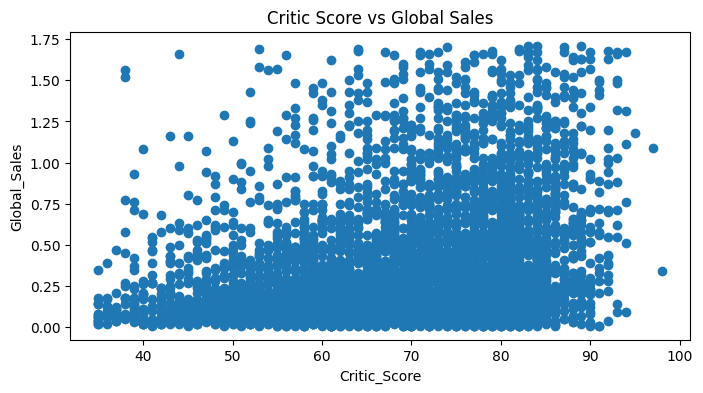

In [90]:
scatter(df,'Critic_Score','Global_Sales','Critic Score vs Global Sales')

## Read as train and val data frames

In [91]:
#split the data into train and validation
df_train, df_val = train_test_split(df, test_size=0.2, random_state=42)
df_train=remove_common_outliers(df ,['Critic_Score'])
df_val = remove_common_outliers(df ,['Critic_Score'])
#convert critic count to int
df_train['Critic_Count'] = df_train['Critic_Count'].astype(int)
df_val['Critic_Count'] = df_val['Critic_Count'].astype(int)
#convert user count to int
df_train['User_Count'] = df_train['User_Count'].astype(int)
df_val['User_Count'] = df_val['User_Count'].astype(int)
# create new column called critic value= critic score * critic count
df_train['Critic_Value'] = df_train['Critic_Score'] * df_train['Critic_Count']
df_val['Critic_Value'] = df_val['Critic_Score'] * df_val['Critic_Count']
# create new column called user value= user score * user count
df_train['User_Value'] = df_train['User_Score'] * df_train['User_Count']
df_val['User_Value'] = df_val['User_Score'] * df_val['User_Count']
# create new column called critic/user ratio= critic value / user value
df_train['Critic_User_Ratio'] = df_train['Critic_Value'] / df_train['User_Value']
df_val['Critic_User_Ratio'] = df_val['Critic_Value'] / df_val['User_Value']
# keep only important features
# keep only important features
selected_features = [ 'Publisher', 'Developer', 'Platform','Genre', 'Critic_User_Ratio','Critic_Score','Critic_Count','Critic_Value','Global_Sales' ]

df_train = df_train[selected_features]
df_val = df_val[selected_features]
df_train.head()

Number of outliers removed: 16
Number of outliers removed: 16


,Publisher,Developer,Platform,Genre,Critic_User_Ratio,Critic_Score,Critic_Count,Critic_Value,Global_Sales
1043,MTV Games,Harmonix Music Systems,Wii,Misc,5.813953,89.0,25,2225.0,1.71
1044,Sony Computer Entertainment Europe,Namco,PS2,Simulation,6.495726,84.0,57,4788.0,1.71
1045,Electronic Arts,Electronic Arts,XB,Racing,6.814450,83.0,25,2075.0,1.71
1054,Electronic Arts,EA Sports,PS2,Sports,7.917088,87.0,18,1566.0,1.70
1055,Electronic Arts,The Sims Studio,PC,Simulation,3.082578,74.0,17,1258.0,1.70


## Handle Missing values 
    - as all features used here are categorical, mode imputation is used 
      to handle missing values.


In [92]:
# handle missing values using mode imputation
df_train =handle_missing_values(df_train, handling_method='mode_interpolate',neighbors=5)
df_val =handle_missing_values(df_val,handling_method='mode_interpolate',neighbors=5)
df_train.head()

Total Number of rows : 5192
Number of rows with missing values: 0
Number of rows after handling missing values: 5192 and Number of missing values: 0
Total Number of rows : 5192
Number of rows with missing values: 0
Number of rows after handling missing values: 5192 and Number of missing values: 0


,Publisher,Developer,Platform,Genre,Critic_User_Ratio,Critic_Score,Critic_Count,Critic_Value,Global_Sales
1043,MTV Games,Harmonix Music Systems,Wii,Misc,5.813953,89.0,25,2225.0,1.71
1044,Sony Computer Entertainment Europe,Namco,PS2,Simulation,6.495726,84.0,57,4788.0,1.71
1045,Electronic Arts,Electronic Arts,XB,Racing,6.814450,83.0,25,2075.0,1.71
1054,Electronic Arts,EA Sports,PS2,Sports,7.917088,87.0,18,1566.0,1.70
1055,Electronic Arts,The Sims Studio,PC,Simulation,3.082578,74.0,17,1258.0,1.70


## prepare features and labels

In [93]:
# global sales our target column to be predicted
y_train = df_train['Global_Sales']
X_train = df_train.drop('Global_Sales', axis=1)
y_val = df_val['Global_Sales']
X_val = df_val.drop('Global_Sales', axis=1)
X_train.head()

,Publisher,Developer,Platform,Genre,Critic_User_Ratio,Critic_Score,Critic_Count,Critic_Value
1043,MTV Games,Harmonix Music Systems,Wii,Misc,5.813953,89.0,25,2225.0
1044,Sony Computer Entertainment Europe,Namco,PS2,Simulation,6.495726,84.0,57,4788.0
1045,Electronic Arts,Electronic Arts,XB,Racing,6.814450,83.0,25,2075.0
1054,Electronic Arts,EA Sports,PS2,Sports,7.917088,87.0,18,1566.0
1055,Electronic Arts,The Sims Studio,PC,Simulation,3.082578,74.0,17,1258.0


In [94]:
X_train.isnull().sum()  


Publisher            0
Developer            0
Platform             0
Genre                0
Critic_User_Ratio    0
Critic_Score         0
Critic_Count         0
Critic_Value         0
dtype: int64

# Models

## Catboost Model

In [95]:
# !pip install catboost

In [96]:
import catboost as cat
cat_feat =[ 'Publisher', 'Developer', 'Platform','Genre']
model = cat.CatBoostRegressor(random_state=100,cat_features=cat_feat,verbose=0)
model.fit(X_train ,y_train)

### Model Accuracy

In [97]:
y_pred = model.predict(X_val)

In [98]:
rmse = sqrt(mean_squared_error(y_val, y_pred))
print('RMSE = ',rmse)

RMSE =  0.22775430443097297


In [99]:
print("R2 score =", round(sm.r2_score( y_val, y_pred), 2))

R2 score = 0.63


## Encoding for cat features for the coming models

In [100]:
X_train.head()
encoding(X_train)

,Publisher,Developer,Platform,Genre,Critic_User_Ratio,Critic_Score,Critic_Count,Critic_Value
1043,0.002889,0.004237,0.073575,0.057011,5.813953,89.0,25,2225.0
1044,0.000385,0.009245,0.183937,0.046032,6.495726,84.0,57,4788.0
1045,0.132704,0.011171,0.100924,0.090331,6.814450,83.0,25,2075.0
1054,0.132704,0.021764,0.183937,0.152542,7.917088,87.0,18,1566.0
1055,0.132704,0.000770,0.054122,0.046032,3.082578,74.0,17,1258.0
...,...,...,...,...,...,...,...,...
16634,0.000770,0.003467,0.018105,0.090331,2.793792,63.0,8,504.0
16656,0.032550,0.000770,0.010208,0.232666,2.903000,81.0,46,3726.0
16677,0.016757,0.003274,0.040447,0.061441,12.272727,81.0,12,972.0
16700,0.000963,0.000193,0.054122,0.103043,2.935044,61.0,12,732.0


### 2- ElasticNet Model

In [101]:
regr = ElasticNet(alpha=0.1)
# Prepare input data (frequncy encoding)
regr.fit(encoding(X_train), y_train)

ElasticNet(alpha=0.1)

In [102]:
y_predicted =regr.predict(encoding(X_val))
print("R2 score =", round(sm.r2_score( y_val, y_predicted), 2))
rmse = sqrt(mean_squared_error(y_val, y_predicted))
print('RMSE = ',rmse)

R2 score = 0.15
RMSE =  0.34307248722959316


### 3- Linear Regression Model

In [103]:
reg = LinearRegression().fit(X_train, y_train)

In [104]:
y_predicted =reg.predict(X_val)
# compute accuracy
print("R2 score =", round(sm.r2_score( y_val, y_predicted), 2))
rmse = sqrt(mean_squared_error(y_val, y_predicted))
print('RMSE = ',rmse)


R2 score = 0.19
RMSE =  0.33408143790023714


In [105]:
from sklearn import svm

regr = svm.SVR()
regr.fit(X_train, y_train)
y_predicted =regr.predict(X_val)
# compute accuracy
print("R2 score =", round(sm.r2_score( y_val, y_predicted), 2))
rmse = sqrt(mean_squared_error(y_val, y_predicted))
print('RMSE = ',rmse)

R2 score = 0.07
RMSE =  0.3596075034970427


## 3- Comparing Expectations to collecting data and models:
       - year of release didn't affect the score at all it was expected 
         as year of release has no correlation with any of the features as we saw
         in data exploration part
       - rating (class of the game) make the score very low 0.07
       - adding critic score to the feature increase score to 0.2
       - removing outliers in both critic score and sales 0.16 (lose about 800 row)
       - removing common outliers between  critic score only 0.17
       - removing outliers in both critic score only 0.19
       - removing outliers in both critic score only 0.27 this with highest score as for very 
       few times (outliers) games with very high score has no sales and this mislead the model 
       but it's okay for very high critic score got low sales as critic not user score and we     can't know user score until the game is sold (print and see what the range of outliers in both to verify this)TODO
       - removing developer from features 0.21
       - removing publisher from features 0.22
       - so clearly combination of the gives the model more info to predict the sales
         as keeping them both retain the highest score which makes sense, publisher only 
        guarantee that the game will have high sales, similarly for developer, people mainly
        buy the games knowing who the publisher they can trust. 
    